In [105]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetimeimport pandas as pd
stocks_data = pd.read_csv('stocks 1.csv')
stocks_data

In [106]:
# @title EXPLORATORY DATA ANALYSIS
# Loading the data from a file
stocks_data = pd.read_csv('stocks 1.csv')

# Show the first few rows and basic information about the data
data_info = stocks_data.info() # Changed 'data' to 'stocks_data'
data_head = stocks_data.head() # Changed 'data' to 'stocks_data'

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


(None,
   Ticker        Date        Open        High         Low       Close  \
 0   AAPL  07-02-2023  150.639999  155.229996  150.639999  154.649994   
 1   AAPL  08-02-2023  153.880005  154.580002  151.169998  151.919998   
 2   AAPL  09-02-2023  153.779999  154.330002  150.419998  150.869995   
 3   AAPL  10-02-2023  149.460007  151.339996  149.220001  151.009995   
 4   AAPL  13-02-2023  150.949997  154.259995  150.919998  153.850006   
 
     Adj Close    Volume  
 0  154.414230  83322600  
 1  151.688400  64120100  
 2  150.639999  56007100  
 3  151.009995  57450700  
 4  153.850006  62199000  )

In [107]:
stocks_data.Ticker.value_counts()


,count
Ticker,
AAPL,62
MSFT,62
NFLX,62
GOOG,62


In [108]:

descriptive_stats = stocks_data.groupby('Ticker')
descriptive_stats['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


In [109]:
# Sort the data by the 'Volume' column in descending order
sorted_data_volume = stocks_data.sort_values(by='Volume', ascending=False) # Changed 'data' to 'stocks_data'

# Display the top 5 rows with the highest trading volume
top_5_volume = sorted_data_volume[['Ticker', 'Date', 'Volume']].head(5)

# Print the top 5 dates with the most stocks sold
print("Top 5 dates with the most stocks sold:")
print(top_5_volume)

Top 5 dates with the most stocks sold:
    Ticker        Date     Volume
61    AAPL  05-05-2023  113316400
27    AAPL  17-03-2023   98944600
188   GOOG  09-02-2023   97798600
18    AAPL  06-03-2023   87558000
23    AAPL  13-03-2023   84457100


In [110]:
# Calculate the profit for each stock (difference between closing price and opening price)
stocks_data['Profit'] = stocks_data['Close'] - stocks_data['Open'] # Changed 'data' to 'stocks_data'

# Group by the stock ticker and sum the total profit for each stock
stock_profit = stocks_data.groupby('Ticker')['Profit'].sum().sort_values(ascending=False) # Changed 'data' to 'stocks_data'

# Display the profit for each stock ticker
print("Total profit for each stock ticker:")
print(stock_profit)

Total profit for each stock ticker:
Ticker
AAPL    28.569946
MSFT    18.839966
GOOG    15.476021
NFLX   -30.749908
Name: Profit, dtype: float64


In [111]:
# Sort the data by the 'High' price in descending order
sorted_data = stocks_data.sort_values(by='High', ascending=False) # Changed 'data' to 'stocks_data'

# Display the top 5 rows with the highest stock prices
top_5_high_prices = sorted_data[['Ticker', 'Date', 'High']].head(5)

In [112]:
# Print the top 5 high prices
print("Top 5 highest stock prices:")
print(top_5_high_prices)

Top 5 highest stock prices:
    Ticker        Date        High
126   NFLX  09-02-2023  373.829987
125   NFLX  08-02-2023  368.190002
124   NFLX  07-02-2023  364.179993
129   NFLX  14-02-2023  363.750000
130   NFLX  15-02-2023  362.880005


In [113]:
# Sort the data by the 'Low' price in ascending order
sorted_data_low = stocks_data.sort_values(by='Low', ascending=True) # Changed 'data' to 'stock_data'

# Display the top 5 rows with the lowest stock prices
top_5_low_prices = sorted_data_low[['Ticker', 'Date', 'Low']].head(5)

# Print the top 5 least low stock prices
print("Top 5 least low stock prices:")
print(top_5_low_prices)

Top 5 least low stock prices:
    Ticker        Date        Low
198   GOOG  24-02-2023  88.860001
200   GOOG  28-02-2023  89.519997
199   GOOG  27-02-2023  89.610001
202   GOOG  02-03-2023  89.769997
201   GOOG  01-03-2023  89.849998


In [114]:
# @title LINEAR REGRESSION
# Convert the 'Date' column to datetime format
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'], format='%d-%m-%Y')

In [115]:
# Convert dates to ordinal (numeric) values for regression
stocks_data['Date_ordinal'] = stocks_data['Date'].apply(lambda date: date.toordinal())

In [116]:
# Extract the features (Date) and target variable (Adj Close)
X = stocks_data[['Date_ordinal']]
y = stocks_data['Adj Close']

In [117]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [119]:
# Predict the target values for test data
y_pred = model.predict(X_test)


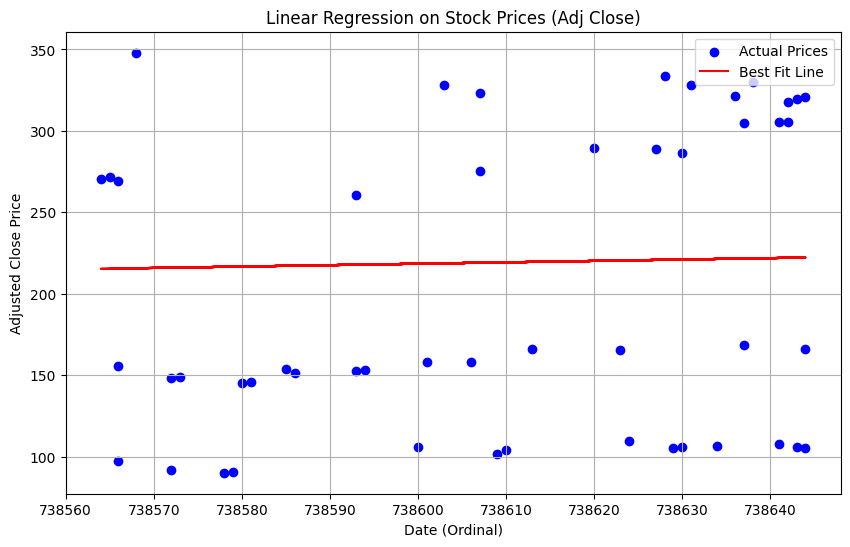

(8310.036359255038, -0.019042937503605195)

In [120]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the actual vs predicted values and the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Best Fit Line')
plt.title('Linear Regression on Stock Prices (Adj Close)')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

mse, r2

In [121]:
# Calculate additional regression metrics: Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mae, mape

(87.246631804702, 56.08417736043175)

In [122]:
# @title LOGISTIC REGRESSION
#Create the binary target variable
stocks_data['Price_Up'] = (stocks_data['Adj Close'].shift(-1) > stocks_data['Adj Close']).astype(int)

# Drop the last row as it won't have a valid comparison
stocks_data = stocks_data.dropna()

# Define the feature set and target variable
X = stocks_data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Using numerical features
y = stocks_data['Price_Up']

In [123]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [125]:
# Make predictions on the test set
y_pred = model.predict(X_test)


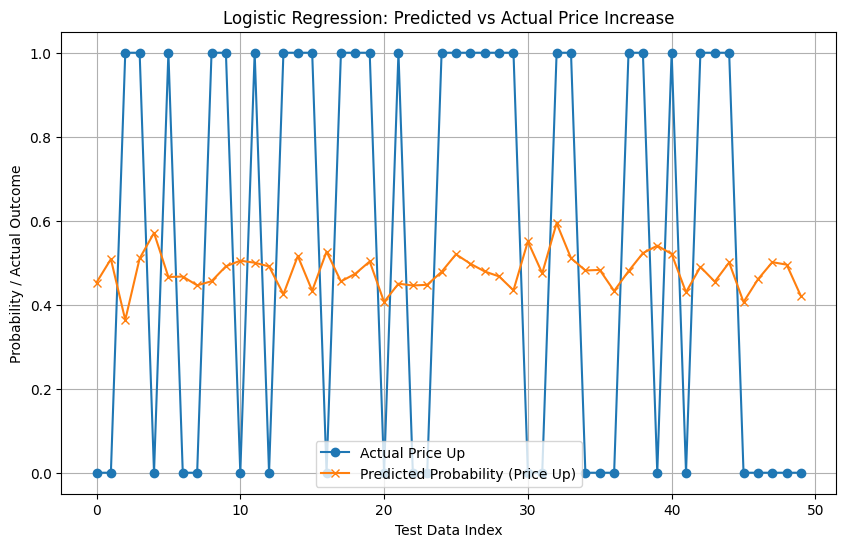

In [126]:
# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the predicted probabilities for class 1 (Price Up)
y_prob = model.predict_proba(X_test)[:, 1]

# Plot the predicted probabilities and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Price Up', marker='o')
plt.plot(y_prob, label='Predicted Probability (Price Up)', marker='x')

plt.title('Logistic Regression: Predicted vs Actual Price Increase')
plt.xlabel('Test Data Index')
plt.ylabel('Probability / Actual Outcome')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
# Generate the classification report to evaluate performance
classification_report_result = classification_report(y_test, y_pred)

classification_report_result

'              precision    recall  f1-score   support\n\n           0       0.48      0.70      0.57        23\n           1       0.59      0.37      0.45        27\n\n    accuracy                           0.52        50\n   macro avg       0.54      0.53      0.51        50\nweighted avg       0.54      0.52      0.51        50\n'

In [128]:
#time series analysis

#time series analysis
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

# Convert the existing 'Date' column to datetime
# Check for typos or case sensitivity issues in the column name
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'], format='%d-%m-%Y') # Changed 'Date' to 'date'
pivot_data = stocks_data.pivot(index='Date',columns='Ticker',values='Close')
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['AAPL'],name='AAPL'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['GOOG'],name='GOOG'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['NFLX'],name='NFLX'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['MSFT'],name='MSFT'))
fig.update_layout(
    title_text="Time Series of Closing Prices",
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

fig.show()


In [129]:
# @title VOLATILITY ANALYSIS
#volatility analysis
volatility = pivot_data.std()
fig = px.bar(
    volatility,
    x=volatility.index,
    y=volatility.values,
    labels={
        'y':'Standard Deviation',
        'x':'Ticker'
    },
    title='Volatility of Closing Prices (Standard Deviation)'
    )
fig.show()


In [130]:
# @title CORRELAATION ANALYSIS
#correlation analysis
correlation_matrix = pivot_data.corr()
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='blues',
        colorbar=dict(title='correlation'),
        text=correlation_matrix.round(2).values,
        texttemplate="%{text}"
    )
)
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title="Ticker",
    yaxis_title="Ticker",
)
fig.show()

In [131]:
# @title COMPARITIVE ANALYSIS
#comparitive analysis
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100
fig = px.bar(
    percentage_change,
    x=percentage_change.index,
    y=percentage_change.values,
    labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
    title='Percentage Change in Closing Prices'
    )
fig.show()


In [132]:
# @title RISK vs RETURN
#daily risks vs return risks
daily_returns = pivot_data.pct_change().dropna()
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

risk_return_df = pd.DataFrame({'Risk':risk,'Average Daily Return':avg_daily_return})

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=risk_return_df["Risk"],
        y=risk_return_df['Average Daily Return'],
        mode="markers+text",
        text=risk_return_df.index,
        textposition="top center",
        marker=dict(size=10)
    )
)
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)
fig.show()

Mean Squared Error: 1.1492446760200026


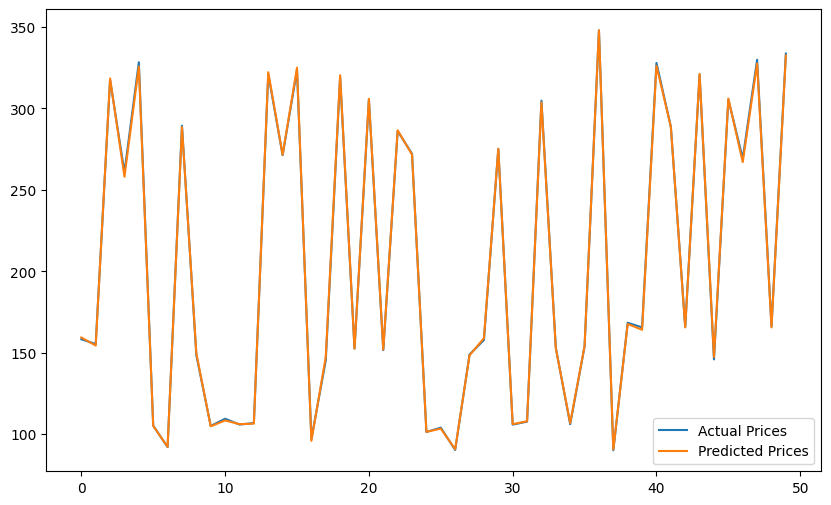

In [134]:
# @title RANDOM FOREST REGRESSION
# Let's assume 'Date' is a column in your dataset and 'Close' is the target feature for prediction
# You may need to adjust the column names based on your dataset

# Convert the 'Date' column to datetime (if present)
if 'Date' in stocks_data.columns:
    stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
    stocks_data.set_index('Date', inplace=True)

# Select features (You can add more relevant features if present in your dataset)
X = stocks_data.drop(['Close'], axis=1)  # Features (Remove 'Close' which is the target)
y = stocks_data['Close']  # Target variable

# Perform one-hot encoding for categorical features
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.show()

In [136]:
# @title BEST ROBUST MACHINE LEARNING MODEL FOR THE GIVEN DATASET
# THE BEST MACHINE LEARNING MODEL AMONG ALL THE MODELS USED IS RANDOM FOREST REGRESSION AS THE PREDICTED PRICES AND ACTUAL PRICES ARE VERY ACUURATE THAN THE OTHER MODELS WHICH IS REPRESENTED IN THE ABOVE GRAPH.